# Wavelet transform
### Theory:
* [wikipedia](https://en.wikipedia.org/wiki/Wavelet_transform)
* [википедия](https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%B9%D0%B2%D0%BB%D0%B5%D1%82-%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)
* [pyWavelets](http://pywavelets.readthedocs.io/en/latest/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (12,4)
plt.rc('font', family='Arial')

np.random.seed(1)

In [2]:
# pywt.wavelist()
COLORS = plt.cm.Greys_r

### Wavelet "Mexican Hat"

In [3]:
def mexh(t, inv=False):
    degr = -t**2/2
    if inv:
        return t**2*np.exp(degr) - np.exp(degr)
    return np.exp(degr) - t**2*np.exp(degr)

def mhat(x, a=1, b=0, inv=False):
    return 1/np.sqrt(a)*mexh((x - b)/a, inv)

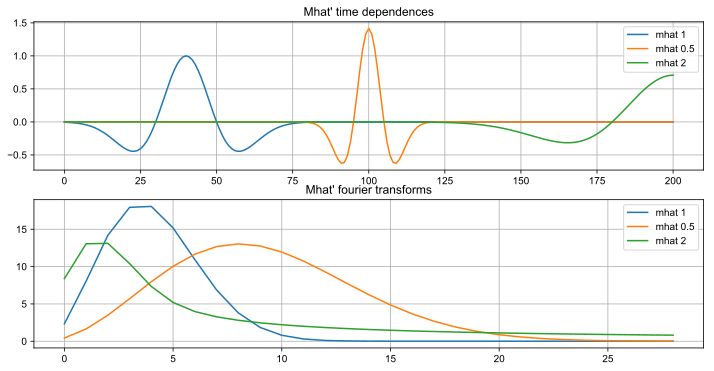

In [4]:
SIZE = 100
STEP = 0.3
INV = False
t_1 = np.linspace(-10, 10, 2*SIZE+1)
t_2 = w_1 = np.linspace(0, 10, SIZE+1)
A = [1, 0.5, 2]
B = [-6, 0, 10]
TITLES = ["Mhat' time dependences", "Mhat' fourier transforms"]

fig, ax = plt.subplots(2, 1)
size = fig.get_size_inches()[0]
fig.set_size_inches(size, size/2)

legend = []
for i, a in enumerate(A):
    mex_hat = mhat(t_1, a=a, b=B[i], inv=INV)
    _ = ax[0].plot(mex_hat)
    _ = ax[1].plot(abs(np.fft.fft(mex_hat))[1:int(STEP*SIZE)])
    legend.append(f"mhat {a}")
for i in range(2):
    _ = ax[i].set_title(TITLES[i])
    _ = ax[i].legend(legend)
    ax[i].grid()

### Discrete Wavelet Transform usage

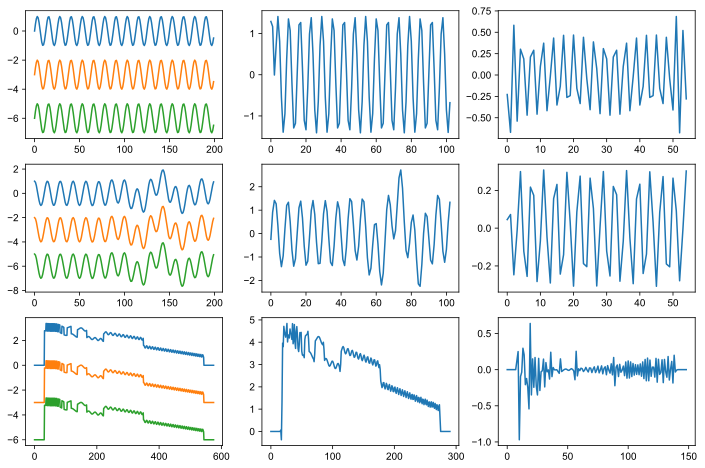

In [5]:
size = 512
x = np.linspace(1, size, size)
sig = list(np.zeros((32,)))
sig.extend(list(-x/250 + 3 + 0.3*np.sign(np.cos(1500/x)) 
                + 0.1*np.sin(x**2/1000) + np.random.rand(1)*0.2))
sig.extend(np.zeros((32,)))
t = np.linspace(-1, 1, 200, endpoint=False)
signals = [
    np.sin(2*np.pi*t*8), 
    np.cos(2*np.pi*7*t) + np.real(np.exp(-7*(t - 0.4)**2)
                                  *np.exp(1j*2*np.pi*2*(t - 0.4))),
    sig
]
BIAS = 3
IDX = -2
method_dwt = 'db4'

fig, ax = plt.subplots(len(signals), 3)
size = fig.get_size_inches()[0]
fig.set_size_inches(size, size/1.5)

for i, signal in enumerate(signals):
    dwtmatr, freqmatr = pywt.dwt(signal, method_dwt)
    wavematr = pywt.wavedec(signal, method_dwt, level=None)
    _ = ax[i][0].plot(signal)
    _ = ax[i][0].plot(pywt.idwt(dwtmatr, freqmatr, method_dwt) - BIAS)
    _ = ax[i][0].plot(pywt.waverec(wavematr, method_dwt) - BIAS*2)
    _ = ax[i][1].plot(dwtmatr)
    _ = ax[i][2].plot(wavematr[IDX])

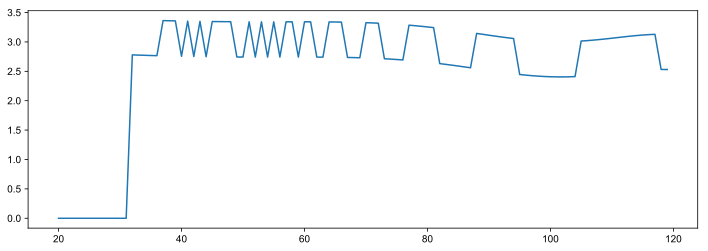

In [10]:
_ = plt.plot(np.arange(20, 120), sig[20:120])

## More complex examples
### Real graphs and continous Wavelet Transform usage

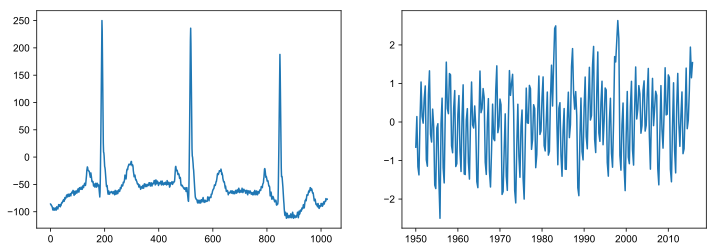

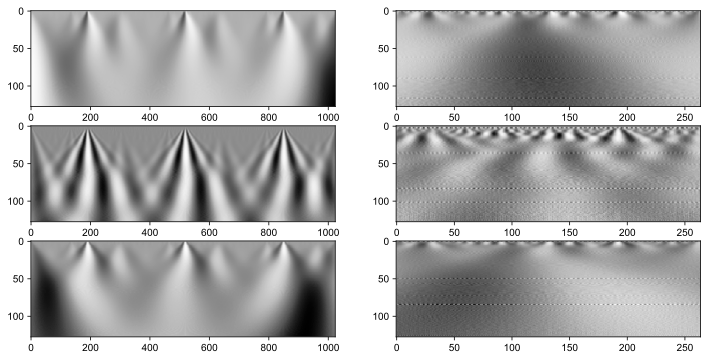

In [6]:
samples = {
    'ecg': pywt.data.ecg(),
    'nino': pywt.data.nino()
}
METHODS = ['gaus1', 'morl', 'mexh']
SCALES = np.arange(1, 129)

fig, ax = plt.subplots(1, len(samples))
_ = ax[0].plot(samples['ecg'])
_ = ax[1].plot(samples['nino'][0], samples['nino'][1])

cwt_fig, cwt_ax = plt.subplots(len(METHODS), len(samples))
size = fig.get_size_inches()[0]
cwt_fig.set_size_inches(size, size/2)
for i, method in enumerate(METHODS):
    coef0, freqs0 = pywt.cwt(samples['ecg'], SCALES, method)
    _ = cwt_ax[i][0].imshow(coef0, cmap=COLORS, aspect='auto')
    coef1, freqs1 = pywt.cwt(samples['nino'][1], SCALES, method)
    _ = cwt_ax[i][1].imshow(coef1, cmap=COLORS, aspect='auto')

### Images compressing

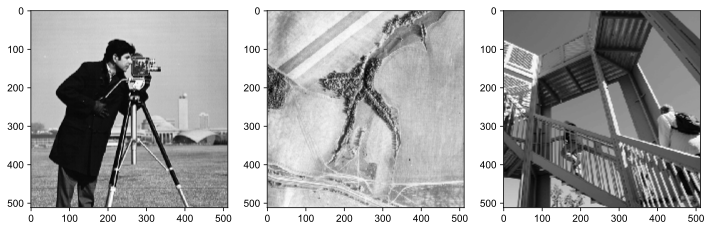

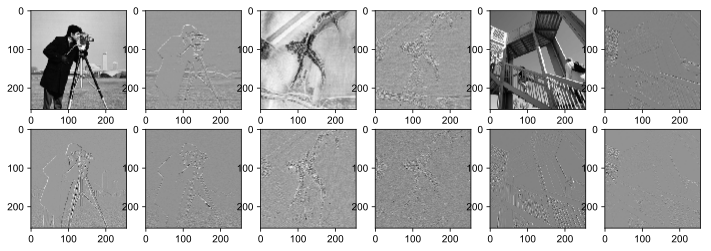

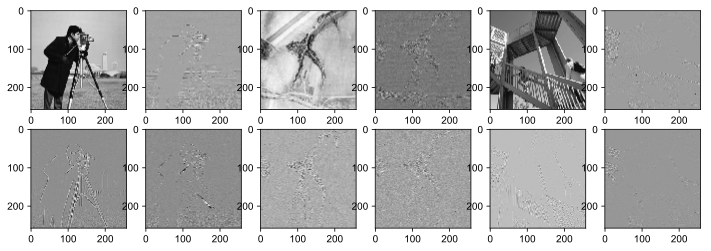

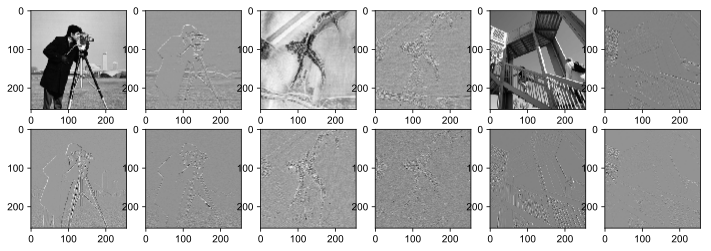

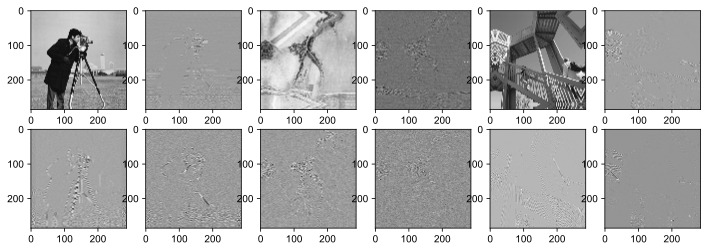

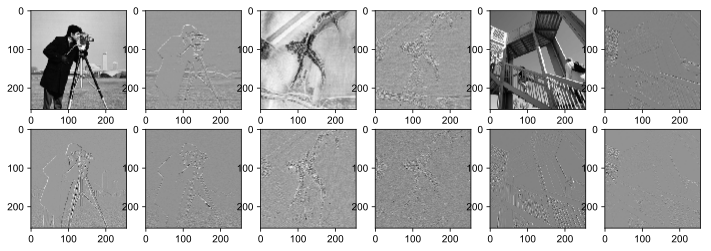

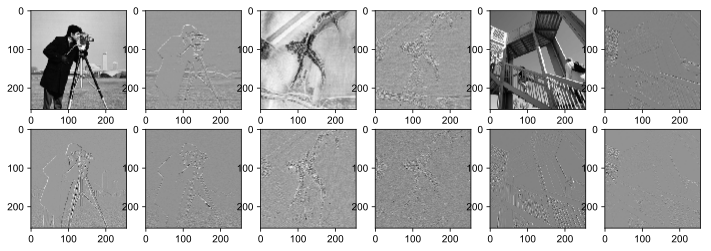

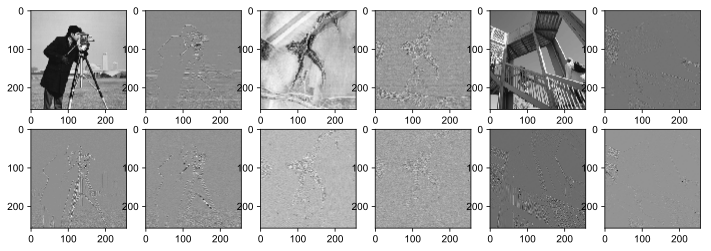

In [7]:
samples = {
    'camera': pywt.data.camera(),
    'aero': pywt.data.aero(),
    'ascent': pywt.data.ascent()
}
SCALES = np.arange(1, 129)
SEPARATE = False
METHODS = ['bior1.1', 'coif1', 'db1', 'dmey', 'haar', 'rbio1.1', 'sym2']
# EXCL_METH = ['cgau1', 'cmor', 'fbsp', 'shan']

fig, ax = plt.subplots(1, len(samples))
fig.set_size_inches(12, 12)
for i, name in enumerate(samples):
    if len(samples) > 1:
        _ = ax[i].imshow(samples[name], cmap=COLORS)
    else:
        _ = ax.imshow(samples[name], cmap=COLORS)

if SEPARATE:
    cwt_fig, cwt_ax = plt.subplots(len(METHODS), len(samples))
    size = fig.get_size_inches()[0]
    if len(samples) > 1:
        cwt_fig.set_size_inches(size, size*len(METHODS)/2.7)
    else:
        cwt_fig.set_size_inches(size, size*len(METHODS))
    for i, method in enumerate(METHODS):
        for j, name in enumerate(samples):
            cA, (cH, cV, cD) = pywt.dwt2(samples[name], method)
            if len(samples) > 1:
                _ = cwt_ax[i][j].imshow(cH, cmap=COLORS, aspect='auto')
            else:
                _ = cwt_ax[i].imshow(cH, cmap=COLORS, aspect='auto')
else:
    for method in METHODS:
        cwt_fig, cwt_ax = plt.subplots(2, len(samples)*2)
        for j, name in enumerate(samples):
            if len(samples) == 1:
                size = fig.get_size_inches()[0]
                cwt_fig.set_size_inches(size, size)
            cA, (cH, cV, cD) = pywt.dwt2(samples[name], method)
            _ = cwt_ax[0][2*j].imshow(cA, cmap=COLORS, aspect='auto')
            _ = cwt_ax[0][2*j+1].imshow(cH, cmap=COLORS, aspect='auto')
            _ = cwt_ax[1][2*j].imshow(cV, cmap=COLORS, aspect='auto')
            _ = cwt_ax[1][2*j+1].imshow(cD, cmap=COLORS, aspect='auto')